In [53]:
from skimage import io as skio
url = 'https://images.unsplash.com/photo-1434389677669-e08b4cac3105?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=949&q=80'
img = skio.imread(url)

In [54]:
print("shape of image: {}".format(img.shape))
print("dtype of image: {}".format(img.dtype))

shape of image: (1362, 949, 3)
dtype of image: uint8


In [55]:
from skimage import filters
sobel = filters.sobel(img)

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.dpi'] = 200

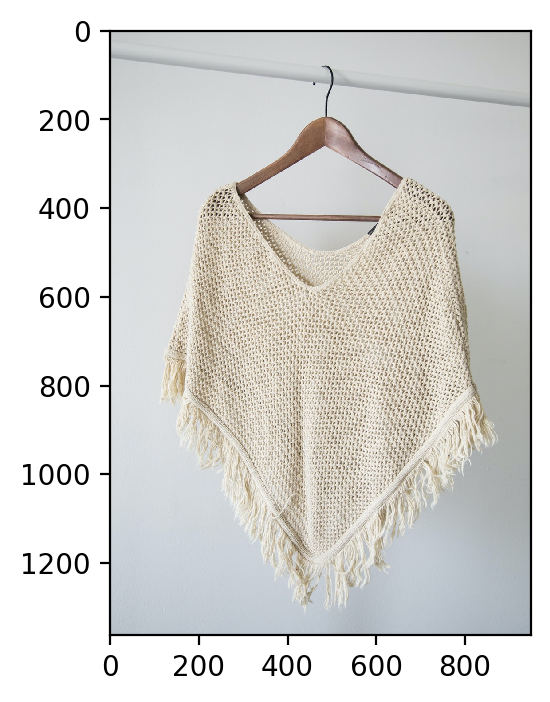

In [58]:
plt.imshow(img)

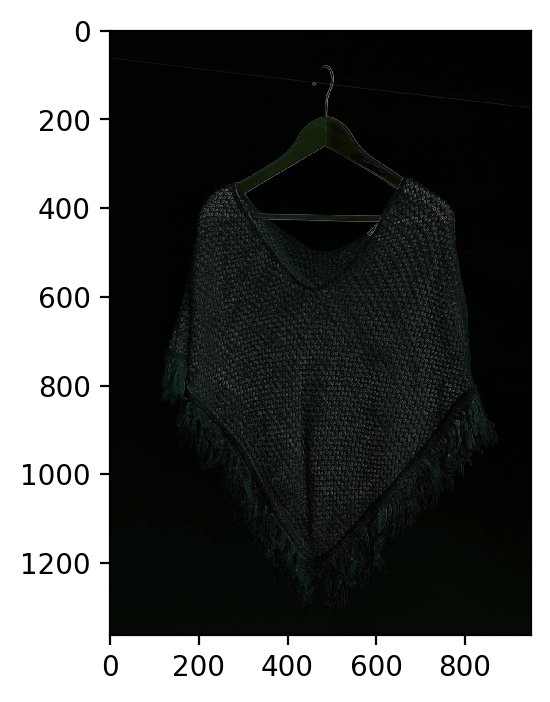

In [59]:
plt.imshow(sobel)

<ipython-input-60-d08507fb61f5>:1: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  blurred = filters.gaussian(sobel, sigma=2.0)


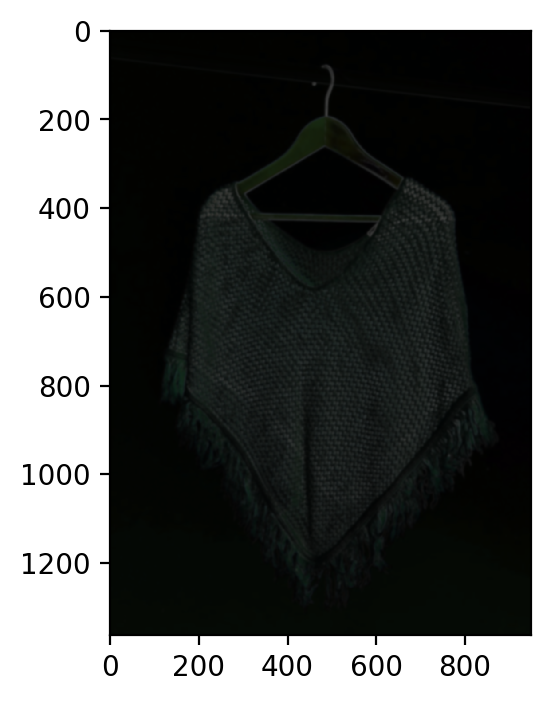

In [60]:
blurred = filters.gaussian(sobel, sigma=2.0)
plt.imshow(blurred)

In [61]:
import numpy as np
light_spots = np.array((img > 245).nonzero()).T

In [62]:
light_spots.shape

(10675, 3)

Text(0.5, 1.0, 'light spots in image')

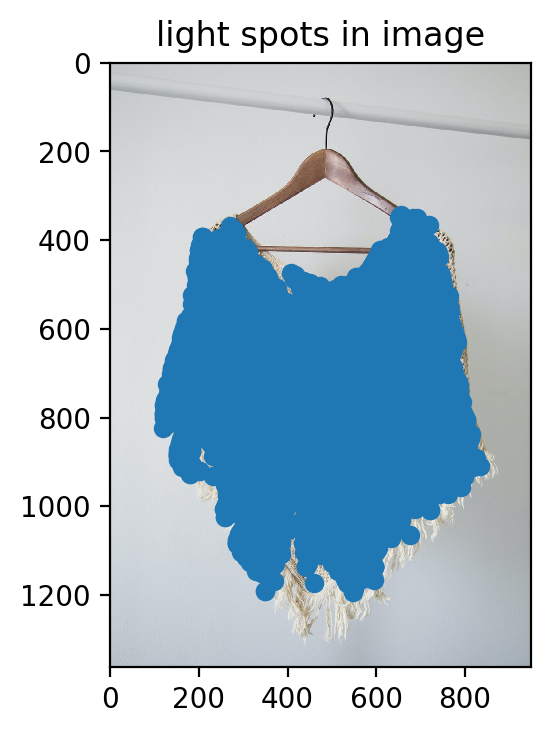

In [63]:
plt.plot(light_spots[:, 1], light_spots[:, 0], 'o')
plt.imshow(img)
plt.title('light spots in image')

In [64]:
dark_spots = np.array((img < 3).nonzero()).T

In [65]:
dark_spots.shape

(9, 3)

Text(0.5, 1.0, 'dark spots in image')

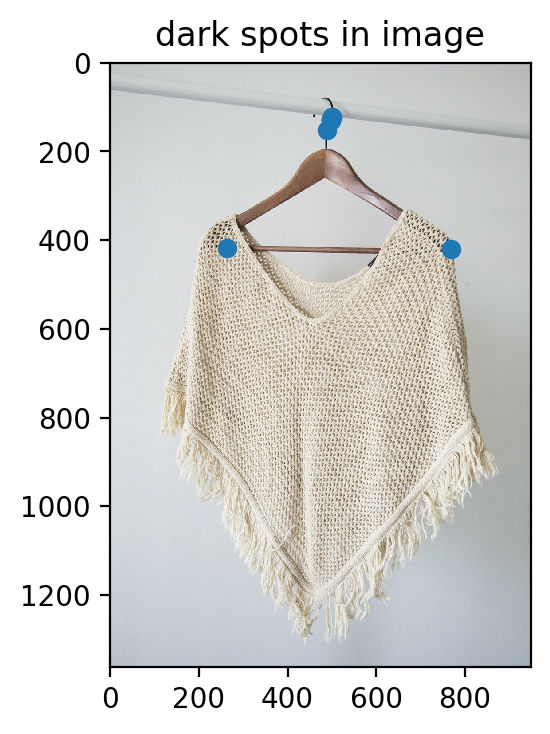

In [66]:
plt.plot(dark_spots[:, 1], dark_spots[:, 0], 'o')
plt.imshow(img)
plt.title('dark spots in image')

In [67]:
##Making a seed mask

In [68]:
from scipy import ndimage as ndi
bool_mask = np.zeros(img.shape, dtype=np.bool)
bool_mask[tuple(light_spots.T)] = True
bool_mask[tuple(dark_spots.T)] = True
seed_mask, num_seeds = ndi.label(bool_mask)
num_seeds

6717

In [69]:
##Applying the watershed

c:\users\amanj\appdata\local\programs\python\python38-32\lib\site-packages\skimage\morphology\_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


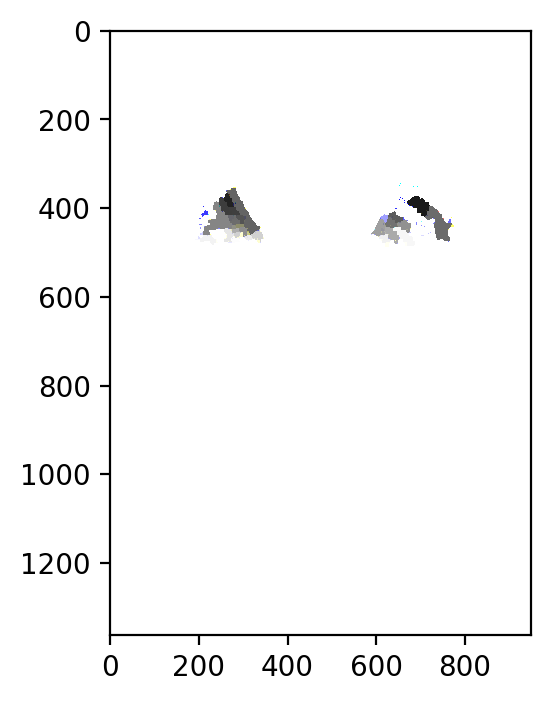

In [70]:
from skimage import morphology
ws = morphology.watershed(blurred, seed_mask)
plt.imshow(ws)

In [71]:
background = max(set(ws.ravel()), key=lambda g: np.sum(ws == g))
background

5207

In [72]:
background_mask = (ws == background)

In [73]:
plt.imshow(~background_mask)

ValueError: Unsupported dtype

<Figure size 1200x800 with 1 Axes>

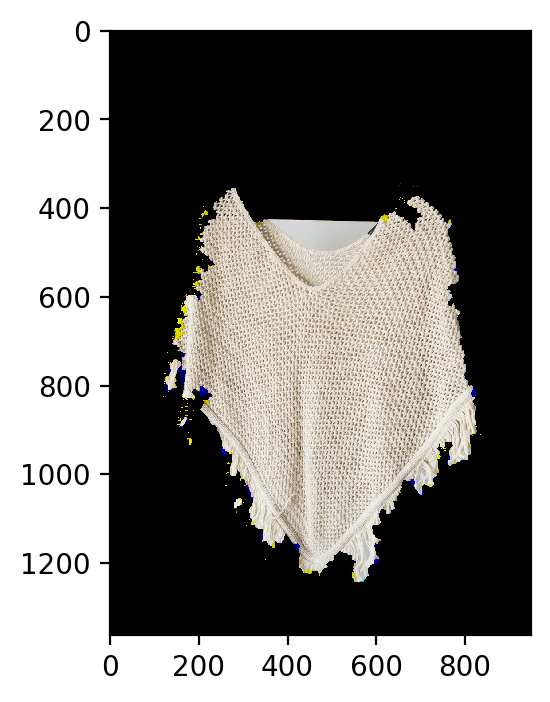

In [74]:
cleaned = img * ~background_mask
plt.imshow(cleaned)

TypeError: Invalid shape (1362, 949, 3, 4) for image data

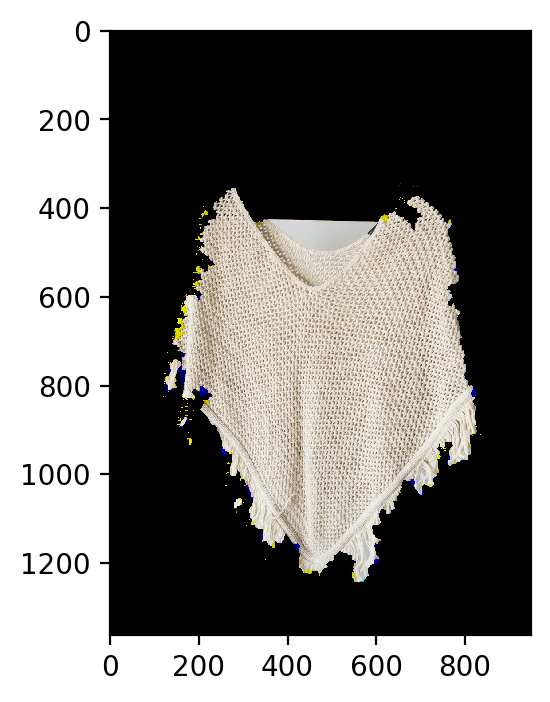

In [75]:
plt.imshow(cleaned, cmap='gray')
plt.imshow(background_mask.reshape(background_mask.shape + (1,)) * np.array([1, 0, 0, 1]))

In [25]:
#Picking another group